In [1]:
import random
import math
import pandas as pd
import numpy as np

# TASK 1. Hashing task!

In [ ]:
import time
from bitarray import bitarray
import sys
import csv
import numpy as np

In [ ]:
import hashing_lib

## Understanding Bloom Filter

passwords1.txt
passwords2.txt

The first dataset represents the "pool" of passwords and we will have to find how many passwords of the second dataset are already present in the pool
The filter should:
    takes as input the 2 datasets, 
    add to the filter all the passwords in the first dataset (passwords1), 
    check which password of the seconds dataset (password2) is present in the filter,
    returns a series of values (execution time, prob of false positive...)
    

In [ ]:
# Passwords 1

In [ ]:
# Passwords 2

In [ ]:
hashing_lib.BloomFilter(passwords1, passwords2)

# TASK 3. Find Similar Wines

 We implemented our version of the k-means clustering algorithm. Afterward, we performed the clustering analysis by using our implementations on the provided dataset

In [2]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 

In [3]:
import clustering_lib

Relevant Information about the `wine.data` dataset:
- no null values
- Threee classes:
   + class 1 -> 59 instances
   + class 2 -> 71 instances
   + class 3 -> 48 instances
- These data are the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars.The analysis determined the quantities of 13 constituents found in each of the three types of wines. 
-  The attributes (all continuous )are:
    + Alcohol
    + Malic acid
    + Ash
    + Alcalinity of ash  
    + Magnesium
    + Total phenols
    + Flavanoids
    + Nonflavanoid phenols
    + Proanthocyanins
    + Color intensity
    + Hue
    + OD280/OD315 of diluted wines
    + Proline  

In [4]:
dataf = clustering_lib.get_data('wine.data')

First we can visualize a scatter plot with unclustered data represented by *Alcohol* and *Malic acid* 

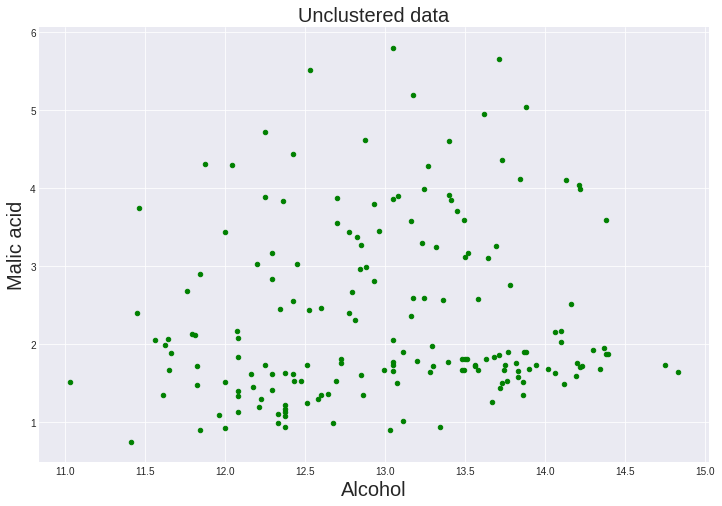

In [5]:
fig = plt.figure(figsize=(12, 8))
plt.style.use('seaborn-darkgrid') #style used
plt.scatter(dataf['Alcohol'], dataf['Malic acid'], c='green', s=20)
plt.xlabel('Alcohol', size= 20)
plt.ylabel('Malic acid', size= 20)
plt.title('Unclustered data', size= 20)
plt.show()

If we want the 3D version, here we can see a scatterplot that visualize together *Alcohol*, *Malic acid*, *Ash*

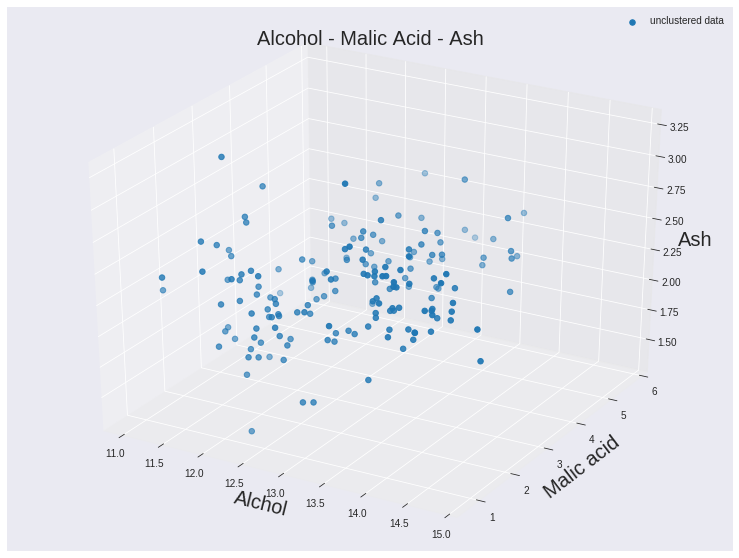

In [6]:
fig = plt.figure(figsize=(13, 10))
ax = fig.add_subplot(111, projection='3d', )
ax.scatter(dataf['Alcohol'],dataf['Malic acid'],dataf['Ash'], label='unclustered data', s=30 )
plt.title('Alcohol - Malic Acid - Ash', size=20)
plt.legend()
ax.set_xlabel('Alchol', size=20)
ax.set_ylabel('Malic acid', size=20)
ax.set_zlabel('Ash', size=20)
plt.show()

We need to normalize the data

In [7]:
normalized= clustering_lib.normalize(dataf)

Choose three centroids at random in our dataset

In [8]:
K=3
centroids= clustering_lib.choose_centroids(normalized, K)  # centroids are a list in which elements is the list of coordinates of each center

Next step is to choose the number of iterations which might guarantee convergence. We need to try many possibilities to find optimum number of iterations required for convergence. There is no need to choose a very large number because say at 100th iteration, if the centroids arrived to their true location or best possible location, even after performing 1000 extra iterations, the algorithm will give same results. So for convenience choosing number of iterations as 100

In [9]:
n_iter=100

We find the euclidian distance from each point to all the centroids and store in a X (rows) K matrix. So every row in 'distances' matrix will have distances of that particular data point from all the centroids. Next, we shall find the minimum distance of each point from each centroids and assign each point in the right cluster.
We repeat this enought times (in our case, we choose 100 times).

Now it's time to apply the function kMeans implemented by us. This returns the clusters we were looking for.

In [10]:
clusters = clustering_lib.kMeans(3, n_iter, normalized, centroids)

Now if we want to visualize the clusters:

In [11]:
clu=[]
for i in range(len(normalized)):
    for j in range(3):
        if list(normalized.loc[i]) in clusters[j]:
            clu.append(j)
            
normalized["class"]= clu

In [18]:
normalized

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,class
0,1.514341,-0.560668,0.231400,-1.166303,1.908522,0.806722,1.031908,-0.657708,1.221438,0.251009,0.361158,1.842721,1.010159,0
1,0.245597,-0.498009,-0.825667,-2.483841,0.018094,0.567048,0.731565,-0.818411,-0.543189,-0.292496,0.404908,1.110317,0.962526,0
2,0.196325,0.021172,1.106214,-0.267982,0.088110,0.806722,1.212114,-0.497005,2.129959,0.268263,0.317409,0.786369,1.391224,0
3,1.686791,-0.345835,0.486554,-0.806975,0.928300,2.484437,1.462399,-0.979113,1.029251,1.182732,-0.426341,1.180741,2.328007,0
4,0.294868,0.227053,1.835226,0.450674,1.278379,0.806722,0.661485,0.226158,0.400275,-0.318377,0.361158,0.448336,-0.037767,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.873810,2.966176,0.304301,0.300954,-0.331985,-0.982841,-1.420891,1.270726,-0.927563,1.139596,-1.388840,-1.227742,-0.021890,2
174,0.491955,1.408636,0.413653,1.049555,0.158126,-0.791103,-1.280731,0.547563,-0.316058,0.967055,-1.126341,-1.481267,0.009866,2
175,0.331822,1.739837,-0.388260,0.151234,1.418411,-1.126646,-1.340800,0.547563,-0.420888,2.217979,-1.607590,-1.481267,0.279786,2
176,0.208643,0.227053,0.012696,0.151234,1.418411,-1.030776,-1.350811,1.351077,-0.228701,1.829761,-1.563840,-1.396759,0.295664,2


### 2-D

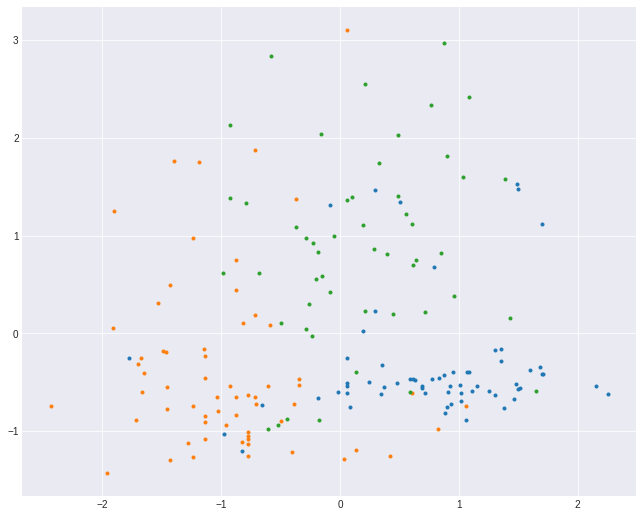

In [12]:
fig = plt.figure(figsize=(11, 9))
for i in range(3):
    plt.scatter(normalized[normalized['class'] == i ]['Alcohol'],
               normalized[normalized['class'] == i ]['Malic acid'],
               marker='.')
plt.show()

### 3-D 

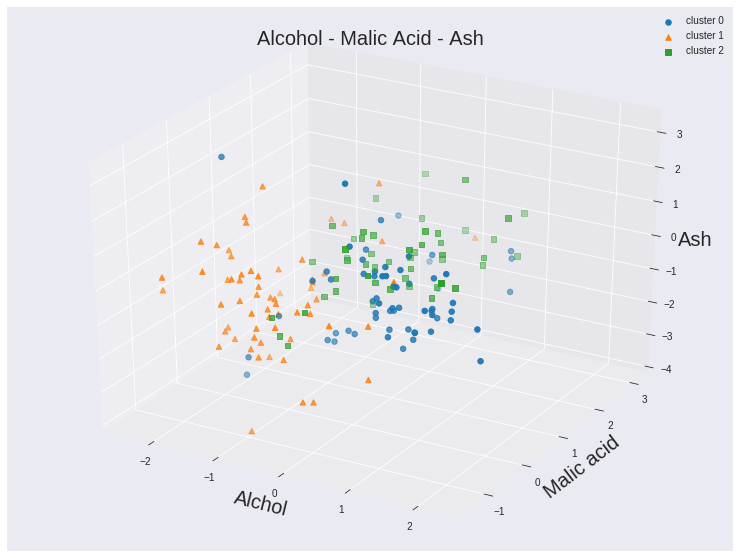

In [17]:
fig = plt.figure(figsize=(13, 10))
ax = fig.add_subplot(111, projection='3d', )

for i,m in [(0,'o'), (1,'^'),(2,'s')]:
    lab= 'cluster '+str(i)
    ax.scatter(normalized[normalized['class'] == i ]['Alcohol'],
               normalized[normalized['class'] == i ]['Malic acid'],
               normalized[normalized['class'] == i ]['Ash'], 
               marker=m, label=lab, s=30)

plt.title('Alcohol - Malic Acid - Ash', size=20)
plt.legend()

ax.set_xlabel('Alchol', size=20)
ax.set_ylabel('Malic acid', size=20)
ax.set_zlabel('Ash', size=20)

plt.show()

# 4. K-means can go wrong!
You might know that k-means performances are significantly conditioned by its initialization. Provide an example that shows that with wrong initialization, the cost of the solution produced by the k-means algorithm can be arbitrarily larger from the cost of the optimal solution. You can either code it, or explain it in a clear text file.

**First, Import necessary libraries**

In [24]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import clustering_lib
import time
import warnings
warnings.filterwarnings('ignore')

- We are going to compare performance of Built-in K-means function our group has been build, with Kmeans++ function with sklearn library. 

The metrics that we are going to check are:

**1. Time Execution: running time for each K-means functions (implementing randomize centroid selection)**

**2. Performance of Clustering: in this case we make a confussion matrix for both K-means and calculate the accuray for each K-means**

- Prepare the data for both clustering

In [17]:
dataf = clustering_lib.get_data('wine.data')
K=3  #K to be decided with the elbow method
# For built-in Kmeans function:
normalized= clustering_lib.normalize(dataf)
centroids= clustering_lib.choose_centroids(normalized, K)

# For K-means++
normalized2 = clustering_lib.normalize(dataf)

Some necessary functions

In [27]:
def predicted_clust(data,cluster):
    clu=[]
    for i in range(len(data)):
        for j in range(3):
            if list(data.loc[i]) in cluster[j]:
                clu.append(j)
    return clu

def actual_clust():
    with open('wine.data', 'r') as f:
        data= list(f.readlines())

    for i in range(len(data)):
        data[i]= data[i][:-1]
        data[i]= list(map(float, data[i].split(',')))

    features=['Target', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash' , 'Magnesium', 'Total phenols', 
            'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 
            'OD280/OD315 of diluted wines','Proline']

    wine= pd.DataFrame(data, columns=features)

    lista = list(wine["Target"])
    for i in range(len(lista)):
        if int(lista[i])==1:
            lista[i]=0    
        elif int(lista[i])==2:
            lista[i]=1   
        elif int(lista[i])==3:
            lista[i]=2    

    return lista

def print_result(data):
    actual = data["actual"]
    predicted = data["predicted"]
    acc = accuracy_score(actual, predicted)
    summary = classification_report(actual, predicted)
    results = confusion_matrix(actual, predicted) 
    print ('Confusion Matrix :')
    print(results) 
    print ('Accuracy Score: ',acc)
    print ('Summary : ')
    print (summary)

- Now Lets run both K-means and see the execution time for both

In [19]:
# Built-in K-means
start = time.time()
cluster1 = clustering_lib.kMeans(3,1000,normalized, centroids)
end = time.time()
print('Excecution Time Built-in Kmeans: ', end-start)

# K-means++
start2 = time.time()
cluster2 = KMeans(n_clusters = 3, init = 'k-means++', n_init = 1000).fit(normalized2)
end2 = time.time()
print('Excecution Time Kmeans++: ', end2-start2)

Excecution Time Built-in Kmeans:  70.7000241279602
Excecution Time Kmeans++:  1.5452210903167725


**We can see with the same sampling number, cluster choosen, and same normalization: Kmean++ run lot faster than built-in Kmeans (randomize initialization centroid)**

- Now we prepare the actual and predicted classes to compare the result of clustering

In [21]:
# Getting predicted and actual cluster from build in Kmeans
normalized["predicted"] = predicted_clust(normalized, cluster1)
normalized["actual"] = actual_clust()

# Getting predicted and actual cluster from Kmeans++
normalized2["predicted"] = cluster2.predict(normalized2)
normalized2["actual"] = actual_clust()

check the result

In [23]:
normalized2

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,predicted,actual
0,1.514341,-0.560668,0.231400,-1.166303,1.908522,0.806722,1.031908,-0.657708,1.221438,0.251009,0.361158,1.842721,1.010159,2,0
1,0.245597,-0.498009,-0.825667,-2.483841,0.018094,0.567048,0.731565,-0.818411,-0.543189,-0.292496,0.404908,1.110317,0.962526,2,0
2,0.196325,0.021172,1.106214,-0.267982,0.088110,0.806722,1.212114,-0.497005,2.129959,0.268263,0.317409,0.786369,1.391224,2,0
3,1.686791,-0.345835,0.486554,-0.806975,0.928300,2.484437,1.462399,-0.979113,1.029251,1.182732,-0.426341,1.180741,2.328007,2,0
4,0.294868,0.227053,1.835226,0.450674,1.278379,0.806722,0.661485,0.226158,0.400275,-0.318377,0.361158,0.448336,-0.037767,2,0
5,1.477387,-0.515911,0.304301,-1.286079,0.858284,1.557699,1.362285,-0.175599,0.662349,0.729811,0.404908,0.335659,2.232741,2,0
6,1.711427,-0.417446,0.304301,-1.465743,-0.261969,0.327374,0.491291,-0.497005,0.679820,0.082781,0.273659,1.363842,1.724655,2,0
7,1.304936,-0.166807,0.887510,-0.567423,1.488427,0.487157,0.481280,-0.416654,-0.595603,-0.003490,0.448658,1.363842,1.740533,2,0
8,2.253415,-0.623328,-0.716315,-1.645408,-0.191954,0.806722,0.951817,-0.577356,0.679820,0.061213,0.536158,0.335659,0.946649,2,0
9,1.058578,-0.882918,-0.351810,-1.046527,-0.121938,1.094330,1.122011,-1.139816,0.452690,0.932547,0.229909,1.321588,0.946649,2,0


In Kmeans++, the function label the predicted cluster assign the label of the cluster abritarily, so in this case we can see, compare to actual value, the mapping of the cluster as follow:
1. Actual 0 -> Predicted 2
2. Actual 1 -> Predicted 0
3. Actual 2 -> Predicted 1,

So we need to tranform the label of the predicted cluster in kmeans++ before we measure the performance

In [25]:
res = normalized2['predicted']
for k, v in enumerate(res):
    if v == 2: res[k] = 0
    elif v == 0: res[k] = 1
    elif v == 1: res[k] = 2

Now we can measure the performance of both Kmeans by looking at confusion matrix and calculate the accuracy

In [28]:
# For built-in Kmeans
print_result(normalized)

# For Kmeans++
print_result(normalized2)

Confusion Matrix :
[[59  0  0]
 [ 5 63  3]
 [ 0  0 48]]
Accuracy Score:  0.9550561797752809
Summary : 
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        59
           1       1.00      0.89      0.94        71
           2       0.94      1.00      0.97        48

    accuracy                           0.96       178
   macro avg       0.95      0.96      0.96       178
weighted avg       0.96      0.96      0.95       178

Confusion Matrix :
[[59  0  0]
 [ 3 65  3]
 [ 0  0 48]]
Accuracy Score:  0.9662921348314607
Summary : 
              precision    recall  f1-score   support

           0       0.95      1.00      0.98        59
           1       1.00      0.92      0.96        71
           2       0.94      1.00      0.97        48

    accuracy                           0.97       178
   macro avg       0.96      0.97      0.97       178
weighted avg       0.97      0.97      0.97       178



### From the result we can see that Kmeans++ have better succes rate (accuracy) of the clustering, therefore we can conclude that kmeans performance conditioned by its initialization. With wrong initialization it can cost the algorithm (in this case the running time) since it tooks longer to reach the convergance of the clustering process.